<a href="https://colab.research.google.com/github/lilasu086/Individual_Coding_Project/blob/main/UnsupervisedMachineLearning_ClusteringAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Prep - K Means

For this part of the assignment, we will use Yahoo finance. Yfinance is the package that will construct our dataset.

- You need to pick 5 stocks (Tickers). Reference - https://stockanalysis.com/stocks/

- In the 2nd cell, you will need to replace the text "YOUR TICKERS GO HERE" with comma separated Tickers i.e. ["AAPL","MSFT","SPY","KO","AMZN"].

- Do not use the same stocks outlined in the above example.

- The 1st cell contains installation commands for specific package versions. Do not change them else the dataset generation code will not work.

- Once you enter your tickers, run the cell, in the folders tab in the left side of your colab screen, you will be able to see the .csv files.

In [ ]:
!pip install yfinance==0.1.62
!pip install pandas==1.3.5

  Preparing metadata (setup.py) ... done
  Created wheel for yfinance: filename=yfinance-0.1.62-py2.py3-none-any.whl size=23863 sha256=85ed5894f85dffba8700a220e8cdfc3ea8f27e060dc10820e55e2c262a5e7439
  Stored in directory: /root/.cache/pip/wheels/6f/d0/b4/131b11c0c2dd0e3869e4f50c11498c2859f8c31b3d72775521
Successfully built yfinance
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is n

In [ ]:
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)
        df['Ticker'] = ticker
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        col_list = ['Ticker','Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return']
        df = df[col_list]
        return df
    except Exception as error:
        print(error)
        return None

ticker=["ABNB", "AMGN",  "GOOGL" ,"GGR", "MNY"] # ["AAPL","MSFT","SPY","KO","AMZN"]
for stock in ticker:
    try:
        input_dir = os.getcwd()
        output_file = os.path.join(input_dir, stock + '.csv')
        df = get_stock(stock, start_date='2022-01-01', end_date='2022-12-31')
        df.to_csv(output_file, index=False)
        print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
    except Exception as e:
        print(e)
        print('Failed to fetch data for', stock)

[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/ABNB.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/AMGN.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/GOOGL.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/GGR.csv
[*********************100%***********************]  1 of 1 completed
wrote 251 lines to file: /content/MNY.csv


### This cell is for installing any python packages you want to use

In [ ]:
!pip install your-package-name

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Question 1 - Feature Engineering

Merge all 5 datasets.

In [ ]:
ABNB = pd.read_csv('/content/ABNB.csv')
AMGN = pd.read_csv('/content/AMGN.csv')
GGR = pd.read_csv('/content/GGR.csv')
GOOGL = pd.read_csv('/content/GOOGL.csv')
MNY = pd.read_csv('/content/MNY.csv')

In [ ]:
print(len(ABNB))
print(len(AMGN))
print(len(GGR))
print(len(GOOGL))
print(len(MNY))

251
251
251
251
251


In [ ]:
print(ABNB.columns)
print(AMGN.columns)
print(GGR.columns)
print(GOOGL.columns)
print(MNY.columns)

Index(['Ticker', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Week_Number',
       'Year_Week', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Return'],
      dtype='object')
Index(['Ticker', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Week_Number',
       'Year_Week', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Return'],
      dtype='object')
Index(['Ticker', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Week_Number',
       'Year_Week', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Return'],
      dtype='object')
Index(['Ticker', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Week_Number',
       'Year_Week', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Return'],
      dtype='object')
Index(['Ticker', 'Date', 'Year', 'Month', 'Day', 'Weekday', 'Week_Number',
       'Year_Week', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Return'],
      dtype='object')


In [ ]:
ABNB

,Ticker,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return
0,ABNB,2022-01-03,2022,1,3,Monday,1,2022-01,165.30,172.84,165.22,172.68,4224900,172.68,0.000000
1,ABNB,2022-01-04,2022,1,4,Tuesday,1,2022-01,174.15,175.90,167.20,170.80,4080000,170.80,-0.010887
2,ABNB,2022-01-05,2022,1,5,Wednesday,1,2022-01,169.88,175.11,162.24,162.25,4804600,162.25,-0.050059
3,ABNB,2022-01-06,2022,1,6,Thursday,1,2022-01,160.29,163.73,156.34,159.75,5049600,159.75,-0.015408
4,ABNB,2022-01-07,2022,1,7,Friday,1,2022-01,159.18,166.88,158.46,166.05,5624600,166.05,0.039437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,ABNB,2022-12-23,2022,12,23,Friday,51,2022-51,84.70,85.51,83.50,85.25,3057700,85.25,0.004477
247,ABNB,2022-12-27,2022,12,27,Tuesday,52,2022-52,84.78,84.93,82.83,83.49,3982400,83.49,-0.020645
248,ABNB,2022-12-28,2022,12,28,Wednesday,52,2022-52,83.25,84.25,81.91,82.49,4931700,82.49,-0.011977
249,ABNB,2022-12-29,2022,12,29,Thursday,52,2022-52,82.97,85.56,82.29,85.23,4031300,85.23,0.033216


In [ ]:
df = pd.concat([ABNB, AMGN, GGR, GOOGL, MNY])
df

,Ticker,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return
0,ABNB,2022-01-03,2022,1,3,Monday,1,2022-01,165.30,172.84,165.22,172.68,4224900,172.68,0.000000
1,ABNB,2022-01-04,2022,1,4,Tuesday,1,2022-01,174.15,175.90,167.20,170.80,4080000,170.80,-0.010887
2,ABNB,2022-01-05,2022,1,5,Wednesday,1,2022-01,169.88,175.11,162.24,162.25,4804600,162.25,-0.050059
3,ABNB,2022-01-06,2022,1,6,Thursday,1,2022-01,160.29,163.73,156.34,159.75,5049600,159.75,-0.015408
4,ABNB,2022-01-07,2022,1,7,Friday,1,2022-01,159.18,166.88,158.46,166.05,5624600,166.05,0.039437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,MNY,2022-12-23,2022,12,23,Friday,51,2022-51,9.88,9.90,9.88,9.89,32600,9.89,-0.002220
247,MNY,2022-12-27,2022,12,27,Tuesday,52,2022-52,9.88,9.93,9.88,9.91,47500,9.91,0.001820
248,MNY,2022-12-28,2022,12,28,Wednesday,52,2022-52,9.90,9.91,9.89,9.90,24000,9.90,-0.000101
249,MNY,2022-12-29,2022,12,29,Thursday,52,2022-52,9.90,9.91,9.90,9.91,60600,9.91,0.001010


Create four new features - **(9 Points)**

- Mean Return
- Volatility (Standard Deviation)
- High Low Spread (High price - Low price)
- Average Trading volume

Basically, you will need to create a new dataset, wherein each week for each ticker will be represented by a single row. This dataset should have columns - Ticker, Week_Number, Mean_Return, Volatility, High_Low_Spread, Average_Trading_Volume. For example, the mean_return for a week with respect to a stock will be the mean of returns for all the days in that week.

*Hint: For each ticker, there should be around 52 data points in the new dataset.*

In [ ]:
df2 = df.groupby(['Ticker', 'Week_Number']).agg( Mean_Return=('Return', 'mean'),Average_Trading_volume=('Volume', 'mean'), Volatility=('Return','std'), High=('High', 'mean'),Low=('Low', 'mean')).reset_index()
df2['High_Low_Spread']=df2['High']-df2['Low']
df2 = df2.drop(['High','Low'], axis=1)
df2

,Ticker,Week_Number,Mean_Return,Average_Trading_volume,Volatility,High_Low_Spread
0,ABNB,1,-0.007383,4756740.0,0.032189,9.0000
1,ABNB,2,-0.002095,4975460.0,0.031787,7.8920
2,ABNB,3,-0.010834,5771750.0,0.033172,7.0875
3,ABNB,4,-0.018081,7480000.0,0.031665,10.2760
4,ABNB,5,0.018070,4441080.0,0.044145,6.7180
...,...,...,...,...,...,...
255,MNY,48,0.000407,16700.0,0.001317,0.0160
256,MNY,49,0.000203,32680.0,0.000770,0.0080
257,MNY,50,0.000203,25780.0,0.001322,0.0140
258,MNY,51,0.000367,38760.0,0.002332,0.0260


# Question 2 - K Means


On the new dataset created in the previous question, perform K means clustering with k = 3 *based on the following features only: Volatility, High Low Spread, and Average Trading volume*. Use a custom initialization by randomly selecting 3 data points from the dataset as initial centroids.

*Use these features for clustering in all upcoming questions.*

*Perform any necessary pre-processing*

**(4 points)**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ticker                  260 non-null    object 
 1   Week_Number             260 non-null    int64  
 2   Mean_Return             260 non-null    float64
 3   Average_Trading_volume  260 non-null    float64
 4   Volatility              260 non-null    float64
 5   High_Low_Spread         260 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.3+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df2[['Volatility', 'High_Low_Spread', 'Average_Trading_volume']])

df_normalized = pd.DataFrame(normalized_data, columns=['Volatility', 'High_Low_Spread', 'Average_Trading_volume'])

df_normalized

,Volatility,High_Low_Spread,Average_Trading_volume
0,0.354298,2.217508,-0.301760
1,0.337624,1.811608,-0.286007
2,0.395120,1.516891,-0.228655
3,0.332556,2.684953,-0.105621
4,0.850491,1.381530,-0.324495
...,...,...,...
255,-0.926920,-1.073653,-0.643154
256,-0.949637,-1.076583,-0.642003
257,-0.926711,-1.074385,-0.642500
258,-0.884804,-1.069989,-0.641565


In [ ]:
df_kmeans1 = df_normalized.copy()
num_clusters = 3
kmeans_result = KMeans(num_clusters,init='random').fit(df_kmeans1)

In [ ]:
kmeans_result.cluster_centers_

array([[-0.02424625, -0.9983498 , -0.61828823],
       [ 0.04439566,  0.95455831, -0.30530452],
       [-0.03897879,  0.1251389 ,  1.85320443]])

In [ ]:
df_kmeans1['cluster_labels'] = kmeans_result.labels_
df_kmeans1

,Volatility,High_Low_Spread,Average_Trading_volume,cluster_labels
0,0.354298,2.217508,-0.301760,1
1,0.337624,1.811608,-0.286007,1
2,0.395120,1.516891,-0.228655,1
3,0.332556,2.684953,-0.105621,1
4,0.850491,1.381530,-0.324495,1
...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,0
256,-0.949637,-1.076583,-0.642003,0
257,-0.926711,-1.074385,-0.642500,0
258,-0.884804,-1.069989,-0.641565,0


Create two 3D figures using plotly:
- a plot with points colored based on the clustering obtained above.
- a plot with points colored based on the clustering obtained by initializing the centroids to some outliers. You are welcome to find these outliers visually or numerically.

Which clustering scheme was better? How did you make that evaluation? Explain thoroughly.

*For the upcoming questions, answer based on the best of the two clusterings you just plotted.*

**(3 Points)**

Answer

From the two plots below, I can conclude that the plot with points colored based on the clustering obtained by randomly selecting 3 data points from the dataset as initial centroids is better than the one initialized with centroids set to some outliers. The former clustering method appears to be more effective in grouping nearby clusters together. However, when the starter points are outliers, the clustering outcome becomes unusual. For instance, points lying on the axis should ideally be clustered together, but in the outlier section, these points are divided into two different clusters. Therefore, I believe that randomly selecting 3 data points as initial centroids is a more suitable approach for clustering.

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df_kmeans1, x='Volatility', y='High_Low_Spread', z='Average_Trading_volume', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

In [ ]:
import numpy as np

In [ ]:
outliers_1 = np.array(df_kmeans1[df_kmeans1['Volatility']>=0.5443097].iloc[-5,:])
outliers_1

array([0.64430968, 0.68549178, 4.56072385, 2.        ])

In [ ]:
outliers_2 = np.array(df_kmeans1[df_kmeans1['Volatility']>=1.516021].iloc[0,:])
outliers_2

array([ 1.6160209 ,  4.0656722 , -0.01957291,  1.        ])

In [ ]:
outliers_3 = np.array(df_kmeans1[df_kmeans1['Volatility']>=1.124537].iloc[-1,:])
outliers_3

array([1.22453719, 0.13232472, 3.10533199, 2.        ])

In [ ]:
df_kmeans2 = df_normalized.copy()

In [ ]:
initial_centers = np.array([[0.64430966, 0.68549178, 4.56072385], [1.61602087,  4.0656722 , -0.01957291], [1.22453718, 0.13232472, 3.10533199]])
print(initial_centers)
kmeans_manual = KMeans(n_clusters=3, init=initial_centers).fit(df_kmeans2)
kmeans_manual.cluster_centers_

[[ 0.64430966  0.68549178  4.56072385]
 [ 1.61602087  4.0656722  -0.01957291]
 [ 1.22453718  0.13232472  3.10533199]]


array([[-0.03897879,  0.1251389 ,  1.85320443],
       [ 0.91985088,  0.76305221, -0.31531293],
       [-0.58254663, -0.54823416, -0.55961087]])

In [ ]:
df_kmeans2['cluster_labels'] = kmeans_manual.labels_
df_kmeans2

,Volatility,High_Low_Spread,Average_Trading_volume,cluster_labels
0,0.354298,2.217508,-0.301760,1
1,0.337624,1.811608,-0.286007,1
2,0.395120,1.516891,-0.228655,1
3,0.332556,2.684953,-0.105621,1
4,0.850491,1.381530,-0.324495,1
...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,2
256,-0.949637,-1.076583,-0.642003,2
257,-0.926711,-1.074385,-0.642500,2
258,-0.884804,-1.069989,-0.641565,2


In [ ]:
fig = px.scatter_3d(df_kmeans2, x='Volatility', y='High_Low_Spread', z='Average_Trading_volume', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Looking at the resulting clustering

1. Do you think the different clusters highlight specific segments or trends in the stock market?
2. Is the obtained clustering related to "Mean Return"? Explain you answer with the proper visualizations.

**(2 Points)**

Answer

1. Based on the clustering results, it seems that there is inconsistency among different clusters. For instance, in the first clustering, we have ABNB, GGR, and MNY, which represent Travel Services, Auto Parts, and Internet Content & Information industries, respectively. These industries are quite diverse. If the clustering were to emphasize specific segments effectively, we would expect to see MNY and GOOGL grouped together since they both belong to the Internet Content & Information industry.

2. Based on the charts below, it seems that the obtained clustering is not correlated with 'Mean Return.' Each cluster does not show a distinct mean return; instead, there is variability in the mean return across clusters, with different levels observed within each clustering. If clustering were related to 'Mean Return,' we would expect to see different mean return levels within each cluster. Therefore, based on my analysis, it appears that the obtained clustering is not influenced by 'Mean Return.'

In [ ]:
merged_df_clustering = pd.merge(df_kmeans1, df2, left_index=True, right_index=True)
merged_df_clustering

,Volatility_x,High_Low_Spread_x,Average_Trading_volume_x,cluster_labels,Ticker,Week_Number,Mean_Return,Average_Trading_volume_y,Volatility_y,High_Low_Spread_y
0,0.354298,2.217508,-0.301760,1,ABNB,1,-0.007383,4756740.0,0.032189,9.0000
1,0.337624,1.811608,-0.286007,1,ABNB,2,-0.002095,4975460.0,0.031787,7.8920
2,0.395120,1.516891,-0.228655,1,ABNB,3,-0.010834,5771750.0,0.033172,7.0875
3,0.332556,2.684953,-0.105621,1,ABNB,4,-0.018081,7480000.0,0.031665,10.2760
4,0.850491,1.381530,-0.324495,1,ABNB,5,0.018070,4441080.0,0.044145,6.7180
...,...,...,...,...,...,...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,0,MNY,48,0.000407,16700.0,0.001317,0.0160
256,-0.949637,-1.076583,-0.642003,0,MNY,49,0.000203,32680.0,0.000770,0.0080
257,-0.926711,-1.074385,-0.642500,0,MNY,50,0.000203,25780.0,0.001322,0.0140
258,-0.884804,-1.069989,-0.641565,0,MNY,51,0.000367,38760.0,0.002332,0.0260


In [ ]:
merged_df_clustering.groupby('cluster_labels')['Ticker'].unique()

cluster_labels
0     [ABNB, GGR, MNY]
1    [ABNB, AMGN, GGR]
2              [GOOGL]
Name: Ticker, dtype: object

In [ ]:
df_kmeans1['cluster_labels'].value_counts()

0    105
1    103
2     52
Name: cluster_labels, dtype: int64

In [ ]:
df_kmeans2['cluster_labels'].value_counts()

2    126
1     82
0     52
Name: cluster_labels, dtype: int64

In [ ]:
df_kmeans1.groupby('cluster_labels').mean()

,Volatility,High_Low_Spread,Average_Trading_volume
cluster_labels,,,
0,-0.024246,-0.998350,-0.618288
1,0.044396,0.954558,-0.305305
2,-0.038979,0.125139,1.853204


In [ ]:
df_kmeans2.groupby('cluster_labels').mean()

,Volatility,High_Low_Spread,Average_Trading_volume
cluster_labels,,,
0,-0.038979,0.125139,1.853204
1,0.919851,0.763052,-0.315313
2,-0.582547,-0.548234,-0.559611


In [ ]:
normalized_data = sc.fit_transform(df2[['Volatility', 'High_Low_Spread', 'Average_Trading_volume', 'Mean_Return']])

df2 = pd.DataFrame(normalized_data, columns=['Volatility', 'High_Low_Spread', 'Average_Trading_volume', 'Mean_Return'])

df2

,Volatility,High_Low_Spread,Average_Trading_volume,Mean_Return
0,0.354298,2.217508,-0.301760,-0.427746
1,0.337624,1.811608,-0.286007,-0.070277
2,0.395120,1.516891,-0.228655,-0.660969
3,0.332556,2.684953,-0.105621,-1.150806
4,0.850491,1.381530,-0.324495,1.292725
...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,0.098860
256,-0.949637,-1.076583,-0.642003,0.085064
257,-0.926711,-1.074385,-0.642500,0.085083
258,-0.884804,-1.069989,-0.641565,0.096112


In [ ]:
merged_df = pd.merge(df_kmeans1, df2, on=['Volatility',	'High_Low_Spread',	'Average_Trading_volume'], how='inner')
merged_df

,Volatility,High_Low_Spread,Average_Trading_volume,cluster_labels,Mean_Return
0,0.354298,2.217508,-0.301760,1,-0.427746
1,0.337624,1.811608,-0.286007,1,-0.070277
2,0.395120,1.516891,-0.228655,1,-0.660969
3,0.332556,2.684953,-0.105621,1,-1.150806
4,0.850491,1.381530,-0.324495,1,1.292725
...,...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,0,0.098860
256,-0.949637,-1.076583,-0.642003,0,0.085064
257,-0.926711,-1.074385,-0.642500,0,0.085083
258,-0.884804,-1.069989,-0.641565,0,0.096112


In [ ]:
merged_df_2 = pd.merge(df_kmeans2, df2, on=['Volatility',	'High_Low_Spread',	'Average_Trading_volume'], how='inner')
merged_df_2

,Volatility,High_Low_Spread,Average_Trading_volume,cluster_labels,Mean_Return
0,0.354298,2.217508,-0.301760,1,-0.427746
1,0.337624,1.811608,-0.286007,1,-0.070277
2,0.395120,1.516891,-0.228655,1,-0.660969
3,0.332556,2.684953,-0.105621,1,-1.150806
4,0.850491,1.381530,-0.324495,1,1.292725
...,...,...,...,...,...
255,-0.926920,-1.073653,-0.643154,2,0.098860
256,-0.949637,-1.076583,-0.642003,2,0.085064
257,-0.926711,-1.074385,-0.642500,2,0.085083
258,-0.884804,-1.069989,-0.641565,2,0.096112


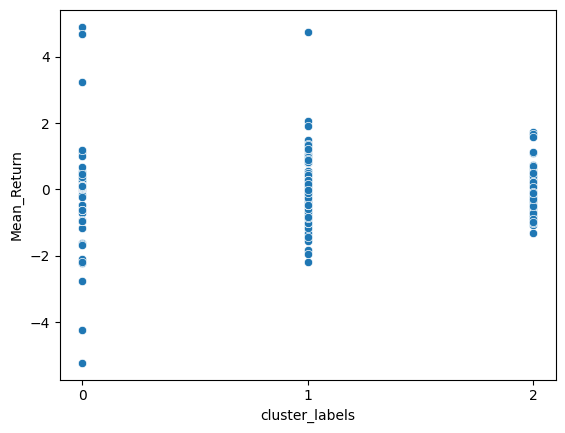

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='cluster_labels',	y='Mean_Return', data=merged_df)
plt.xticks([0, 1, 2]);

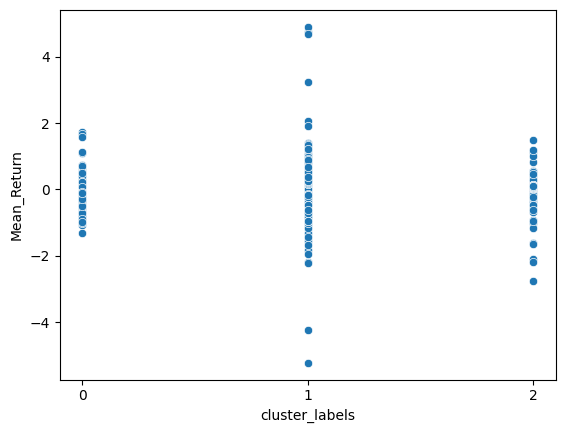

In [ ]:
sns.scatterplot(x='cluster_labels',	y='Mean_Return', data=merged_df_2)
plt.xticks([0, 1, 2]);

# Question 3 - Optimal K

### For both Optimal K questions, 2 <= k <= 10.

### Also present any visualizations if necessary.

Write python code to determine optimal k using the elbow method. **(2 Points)**

In [ ]:
import matplotlib.pyplot as plt

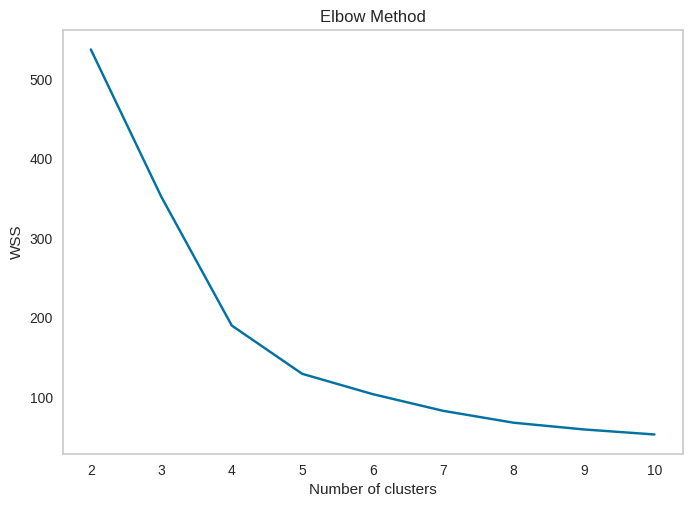

In [ ]:
K = range(2, 11)
wss = []
for k in K:
  kmeans = KMeans(n_clusters=k , init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df_normalized)
  wss.append(kmeans.inertia_)

result_df = pd.DataFrame({'cluster': K, 'wss': wss})

plt.plot(range(2, 11), wss)
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.grid()
plt.show();

Write python code to determine optimal k using the silhouette method. **(2 Points)**

Reference: https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

`[silhouette method]`

The silhouette method is a technique used to evaluate clustering results and determine the optimal number of clusters. It measures the compactness and separation of clusters by computing the silhouette coefficient for each sample. The silhouette coefficient considers both the cohesion of a sample with its own cluster (compared to others within the same cluster) and the separation from the nearest neighboring cluster.

Here's how the silhouette coefficient is calculated:
1. For each sample, compute the average distance to all other samples in the same cluster, denoted as "a".
2. For each sample, compute the average distance to all samples in the nearest neighboring cluster, denoted as "b".
3. Compute the silhouette coefficient as (b - a) / max(a, b) for each sample.
4. Take the average silhouette coefficient across all samples to obtain the overall silhouette coefficient for the clustering.

The silhouette coefficient ranges from -1 to 1:
- A coefficient close to 1 indicates that the sample is well-clustered and far from neighboring clusters, suggesting a good clustering result.
- A coefficient close to 0 indicates that the sample's distance to its own cluster is similar to its distance to neighboring clusters, suggesting overlapping clusters.
- A coefficient close to -1 indicates that the sample is misclassified, with a closer proximity to a neighboring cluster than its own cluster.

By computing the average silhouette coefficient for different numbers of clusters, you can choose the number of clusters with the highest average silhouette coefficient as the optimal number of clusters.

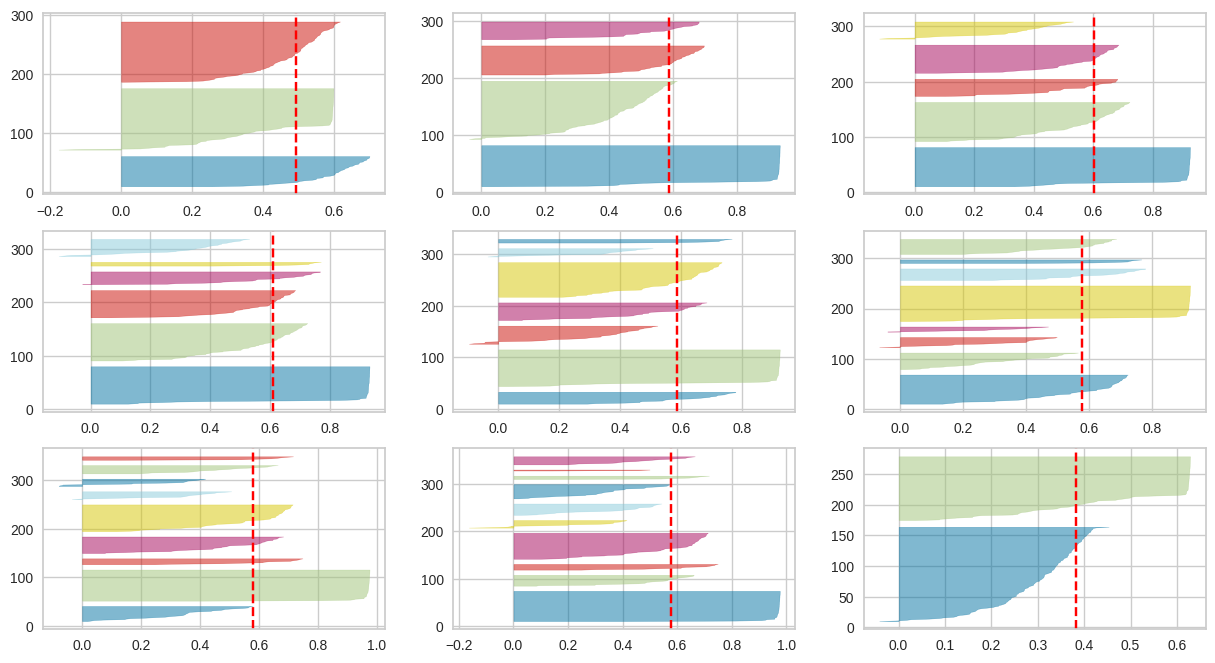

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for k in K:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_normalized)

Considering both methods, what do you think should be the optimal K. Explain in details? **(2 Points)**

Answer

For the elbow method, I believe the optimal K is 4 because there is a distinct turning point in the plot. However, according to the silhouette method, the optimal K is 5. While the silhouette score for 6 clusters is the highest, the thickness of the clusters for K=5 is relatively consistent, and the scores are not significantly lower than those for K=6.

# Question 4 - Hierarchical Clustering

Perform Hierarchical Clustering with K ranging from 2 to 11. Use the silhouette score to determine optimal K. Plot a graph with K on the X-axis and silhouette score on the Y-axis. **(4 Points)**

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

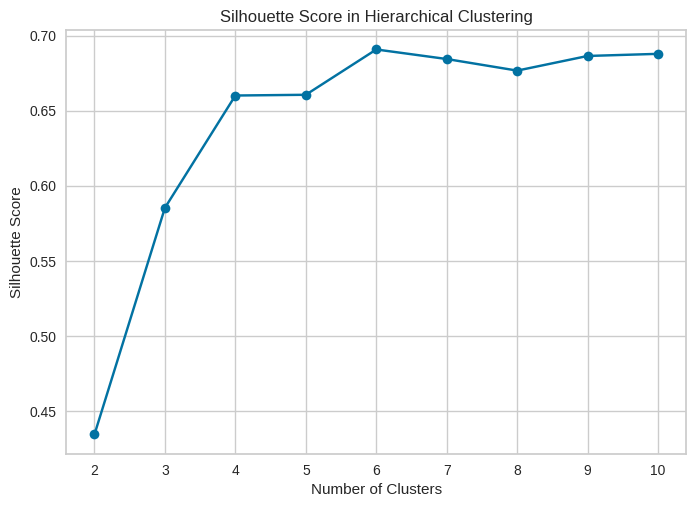

In [ ]:
silhouette_scores = []
for k in K:
  Z = linkage(df_normalized, 'ward')
  df_normalized['cluster_labels'] = fcluster(Z, k, criterion='maxclust')
  silhouette_avg = silhouette_score(df_normalized, df_normalized['cluster_labels'])
  silhouette_scores.append(silhouette_avg)

plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score in Hierarchical Clustering')
plt.show()

Answer

From the above plot, the silhouette score is highest for 6 clusters, indicating that the optimal K is 6.

After performing hierarchical clustering, you decide to apply your model to new incoming data (test data). Assuming the test data comes in a dataframe similar in shape to the original data you used to create the model, how would you use the same clustering arrangement with the new dataset? Explain any observations or challenges you find relevant. **(2 Points)**

Answer

In my view, if there's a dataframe with a similar shape to the original data, I believe the clustering arrangement would remain consistent with the new dataset. This consistency arises because the hierarchical clustering process is deterministic, meaning it produces the same grouping structure or pattern regardless of the specific data values.

To elaborate, the "clustering arrangement" denotes the grouping structure formed during clustering, where each data point is assigned to a specific cluster based on its proximity to others. In hierarchical clustering, this structure is determined by iteratively merging the closest data points or clusters until all points are grouped together.

Therefore, since the clustering process is based on the relationships between data points rather than their specific values, the same clustering arrangement would likely be applied to the new dataset.